In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

%matplotlib inline

# UFO data analysis

 NUFORC (National UFO Reporting Center) geolocated and time standardized ufo reports for close to a century of data. 
 80,000 plus reports.

 LIMITATIONS OF THE DATASET

 -dealing with mostly categorical data
 
 -most of the data is from the USA and is certainly not worldwide
 
 -UFO shapes are subjective to the person that encountered it and are only stored as a single catergorical
 
 -The duration of sightings is not clearly defined, and it is unclear whether it reflects the actual event's 
  duration or the observer's viewpoint.



In [4]:
#importing raw data
raw_data = pd.read_csv('ufo.csv', low_memory=False)
#importing data to manipulate
df = pd.read_csv('ufo.csv', low_memory=False)

#low memory = False means it loads the whole csv file in at once to stop potentially
#skipping over some of the data

In [5]:
#checking data imported correctly
df.head(1)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111


# Business objectives

 business objectives:


Main project goal.
 ased on the frequency and location of UFO sightings, which geographic areas demonstrate the 
 highest levels of interest or historical significance related to UFOs? 


Additional goals. 
 Is there a trend of decreasing UFO sightings over time, and if so, does this suggest a waning interest in UFOs?

Hypothesis test. 
 We will conduct a hypothesis test to determine whether there is a significant difference 
 in the frequency of light-shaped UFO sightings compared to sightings of other shapes. The hypothesis 
 is that the distribution of light-shaped sightings does not differ from the distribution of sightings of other   shapes.

The dataset will be split into two groups: 'light' sightings and 'other' sightings. We will then use appropriate 
 statistical tests to compare the frequency of these two groups across different countries.


# Checking the data

In [7]:
# checking shape, 80,332 rows and 11 columns
df.shape

(80332, 11)

In [8]:
# calling df.info to see NaN values and check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [9]:
# identify unique objects in column 'shape'
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome', 'changed'],
      dtype=object)

In [10]:
df['country'].unique()
#us United States
#gb Great Britain
#ca Canada
#au Australia
#de Germany

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [11]:
df['state'].unique()

array(['tx', nan, 'hi', 'tn', 'ct', 'al', 'fl', 'ca', 'nc', 'ny', 'ky',
       'mi', 'ma', 'ks', 'sc', 'wa', 'ab', 'co', 'nh', 'wi', 'me', 'ga',
       'pa', 'il', 'ar', 'on', 'mo', 'oh', 'in', 'az', 'mn', 'nv', 'nf',
       'ne', 'or', 'bc', 'ia', 'va', 'id', 'nm', 'nj', 'mb', 'wv', 'ok',
       'ri', 'nb', 'vt', 'la', 'pr', 'ak', 'ms', 'ut', 'md', 'mt', 'sk',
       'wy', 'sd', 'pq', 'ns', 'qc', 'de', 'nd', 'dc', 'nt', 'sa', 'yt',
       'yk', 'pe'], dtype=object)

# Data type conversion

In [13]:
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [15]:
#it seems there is a value 2` somewhere in our dataframe 
#stored in the duration column lets remove it and see if it's the only one
droprow = df['duration (seconds)'] == '2`'
df = df.drop(index=df[droprow].index)

In [ ]:
#Import re which helped me find those pesky non numerical values in
#my duration(seconds) column

import re

non_numeric_values = df[~df['duration (seconds)'].astype(str).str.match(r'^-?\d+\.?\d*$')]
print(non_numeric_values)

#^: start of the string
#-?: optional negative sign
#\d+: one or more digits
#\.?: optional decimal point
#\d*: zero or more digits
#$: end of the string

In [17]:
#drop the rows with the non numericals

droprow2 = df['duration (seconds)'] == '8`'
df = df.drop(index=df[droprow2].index)

droprow3 = df['duration (seconds)'] == '2631600  '
df = df.drop(index=df[droprow3].index)

droprow4 = df['duration (seconds)'] == '0.5`'
df = df.drop(index=df[droprow4].index)

In [18]:
#converting to a float worked this time!
df['duration (seconds)'] = df['duration (seconds)'].astype(float)

In [19]:
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)      float64
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [20]:
#Value error: Location should consist of two numerical values, but 
#'33q.200088' of type <class 'str'> is not convertible to float.


# Get the index of the row with latitude value '33q.200088'
index_to_drop = df[df['latitude'] == '33q.200088'].index[0]

# Drop the row with that index
df.drop(index_to_drop, inplace=True)

#decided to drop this row 

In [21]:
df['latitude'] = df['latitude'].astype(float)

In [22]:
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)      float64
duration (hours/min)     object
comments                 object
date posted              object
latitude                float64
longitude               float64
dtype: object

In [23]:
#replacing 24:00 with 00:00 in datetime column
df['datetime'] = df['datetime'].str.replace('24:00', '00:00')


In [24]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')
df.dtypes

datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)             float64
duration (hours/min)            object
comments                        object
date posted                     object
latitude                       float64
longitude                      float64
dtype: object

# Data cleaning

In [25]:
#calculate the sum of the null values in each column
df.isnull().sum()

datetime                   0
city                       0
state                   5795
country                 9667
shape                   1929
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [26]:
# function to check for other hidden null values that are not NaN

def replace_hidden_values(df, columns_list):
    values_to_replace = ["?", "-", "_", " ", "  ", "   ", "n/a", "nan", "."]
    for col in columns_list:
        df[col] = df[col].replace(values_to_replace, np.nan)
    return df



In [27]:
#check NaN values again
df.isnull().sum()

datetime                   0
city                       0
state                   5795
country                 9667
shape                   1929
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [28]:
#run our function
df = replace_hidden_values(df, list(df.columns))

In [29]:
#check NaN values again
df.isnull().sum()

# we can see here our function found 1 hidden null value in 'city' column
# and 1 in 'comments' these have been replaced with NaN

datetime                   0
city                       1
state                   5795
country                 9667
shape                   1929
duration (seconds)         0
duration (hours/min)       0
comments                  16
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [30]:
#replacing NaN values in state column with 'unknown_state'
df['state'] = df['state'].fillna('unknown_state')

In [31]:
#replacing NaN values in city column with 'unknown_city'
df['city'] = df['city'].fillna('unknown_city')

In [32]:
#replacing NaN values in country column with 'unknown_country'
df['country'] = df['country'].fillna('unknown_country')

In [33]:
#replacing NaN values in shape column with 'other'
df['shape'] = df['shape'].fillna('other')

In [34]:
#replacing NaN values in comments column with 'no_comment'
df['comments'] = df['comments'].fillna('no_comment')

In [35]:
#check NaN values again
df.isnull().sum()

#we can see here all the null values have been replaced

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
dtype: int64

In [38]:
#was getting a key error for longitude so checking column names 
#I can see there is an extra space after the word.
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [36]:
#removing unwanted the space
df = df.rename(columns = {'longitude ':'longitude'})

In [125]:
#check again
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')

# Initial EDA

In [133]:
most_common_year = df['datetime'].dt.year.value_counts().idxmax()
print(f"The year with the most entries is {most_common_year}")

The year with the most entries is 2012


In [134]:
least_common_year = df['datetime'].dt.year.value_counts().idxmin()
print(f"The year with the least entries is {least_common_year}")

The year with the least entries is 1929


In [139]:
most_common_country = df['country'].value_counts().idxmax()
print(f"The country with the most sightings is {most_common_country}")

The country with the most sightings is us


In [135]:
most_common_city = df['city'].value_counts().idxmax()
print(f"The city with the most sightings is {most_common_city}")

The city with the most sightings is seattle


In [138]:
most_common_city = df['city'].value_counts().max()
print(f"The city with the most sightings has {most_common_city} sightings")


The city with the most sightings has 525 sightings


In [136]:
most_common_state = df['state'].value_counts().idxmax()
print(f"The state with the most entries is {most_common_state}")

The state with the most entries is ca


In [137]:
most_common_state = df['state'].value_counts().max()
print(f"The state with the most entries has {most_common_state} sightings")

The state with the most entries has 9654 sightings


In [140]:
mean_duration = df['duration (seconds)'].mean()
print(f"The mean duration of UFO sightings is {mean_duration:.2f} seconds")

The mean duration of UFO sightings is 8984.69 seconds


In [141]:
median_duration = df['duration (seconds)'].median()
print(f"The median duration of UFO sightings is {median_duration:.2f} seconds")

The median duration of UFO sightings is 180.00 seconds


In [142]:
most_common_shape = df['shape'].value_counts().idxmax()
print(f"The most common shape in UFO sightings is '{most_common_shape}'")

The most common shape in UFO sightings is 'light'


In [143]:
least_common_shape = df['shape'].value_counts().nsmallest(1).index[0]
print(f"The least common shape in UFO sightings is '{least_common_shape}'")

The least common shape in UFO sightings is 'pyramid'


# Data visualisation

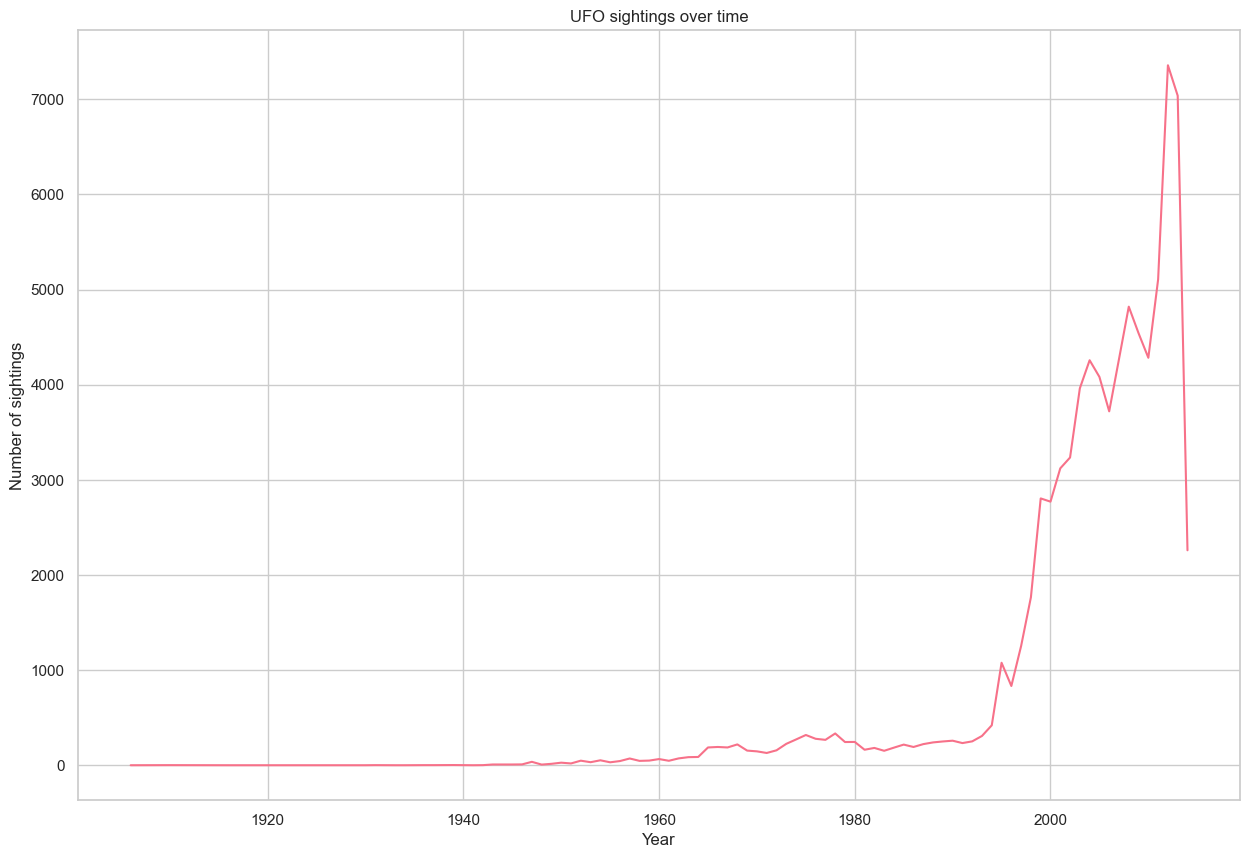

In [166]:
sightings_by_year = df.groupby(df['datetime'].dt.year)['datetime'].count()

sns.lineplot(x=sightings_by_year.index, y=sightings_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of sightings')
plt.title('UFO sightings over time')
plt.show()

In [170]:
most_common_year = df['datetime'].dt.year.value_counts().idxmax()
print('The year with the most rows is:', most_common_year)

The year with the most rows is: 2012


In [172]:
num_entries_2012 = df[df['datetime'].dt.year == 2012].shape[0]
print('The actual number of entries from 2012 is:', num_entries_2012)

The actual number of entries from 2012 is: 7357


In [171]:
last_year = df['datetime'].max().year
print('The last year in the column is:', last_year)

The last year in the column is: 2014


In [173]:
num_entries_2014 = df[df['datetime'].dt.year == 2014].shape[0]
print('The actual number of entries from 2014 is:', num_entries_2014)

The actual number of entries from 2014 is: 2260


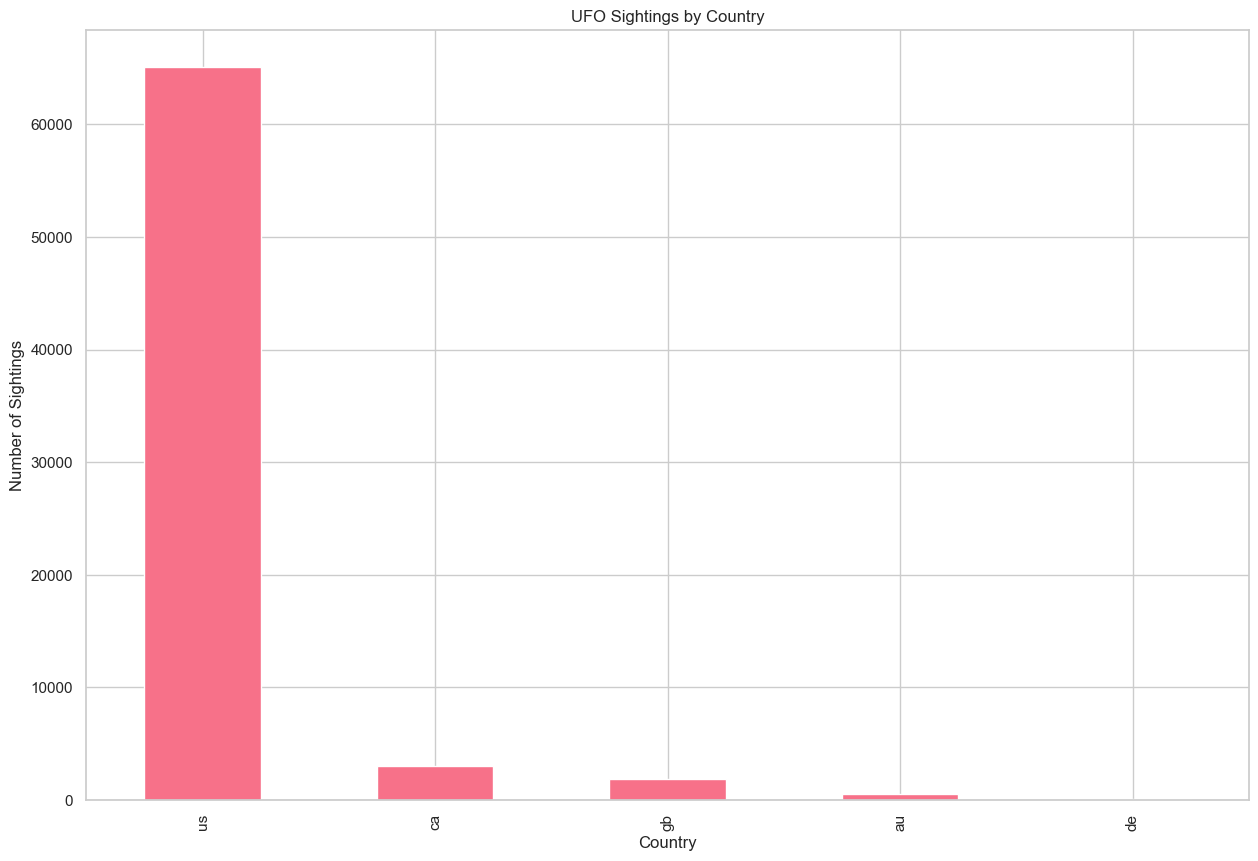

In [176]:
#here we plot the number of sightings per country to visualise where most of 
#our data is from.

#filtering out uknown countries
country_counts = df[df['country'] != 'unknown_country']['country'].value_counts()

# create the plot
country_counts.plot(kind='bar')
plt.title('UFO Sightings by Country')
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.show()

#concluding that an overwhelming majority are in the united states

#us United States
#gb Great Britain
#ca Canada
#au Australia
#de Germany

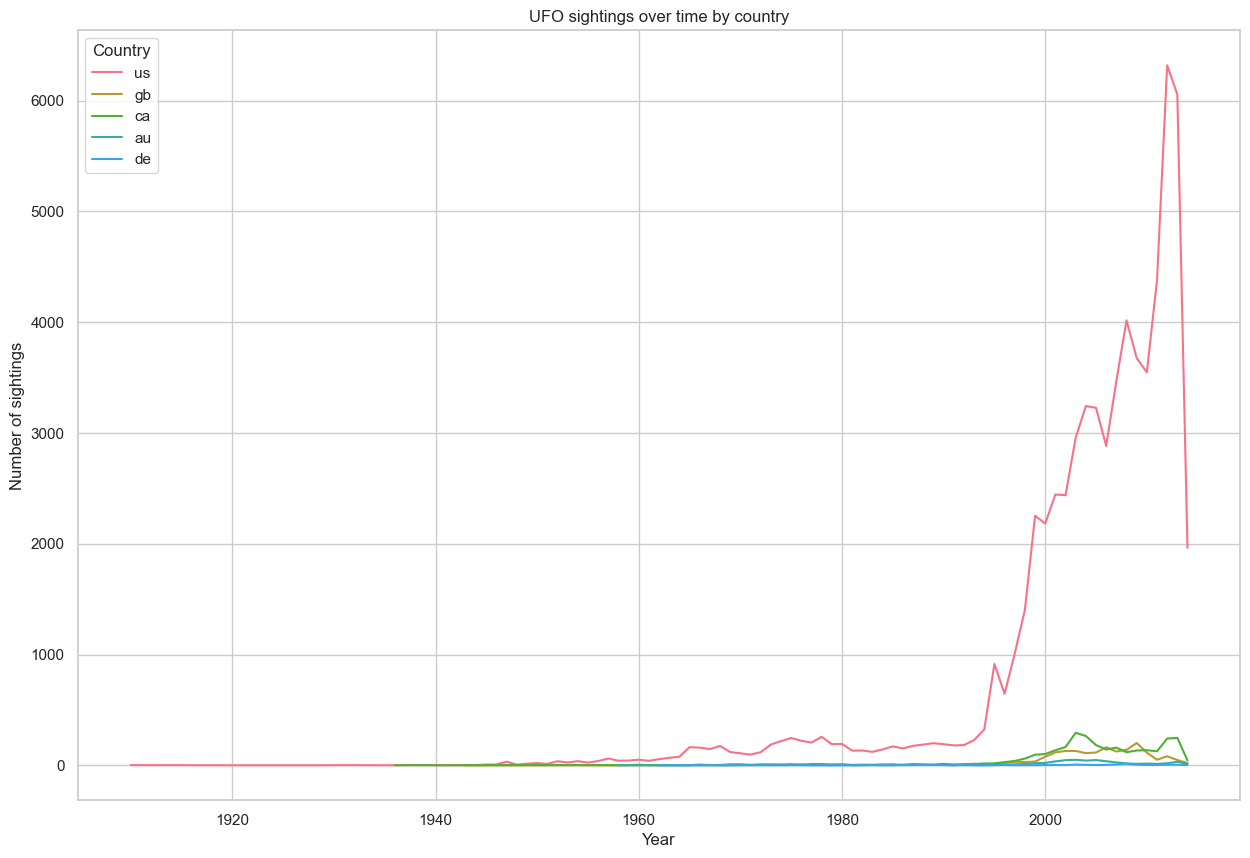

In [175]:
#UFO sightings over time by country
#skip the unknown_country
sightings_by_country_and_year = df.groupby([df['country'], df['datetime'].dt.year])['datetime'].count()

countries = df['country'].unique()

for country in countries:
    if country == 'unknown_country':  # skip the unknown_country
        continue
    country_sightings_by_year = sightings_by_country_and_year[country]
    plt.plot(country_sightings_by_year.index, country_sightings_by_year.values, label=country)

plt.xlabel('Year')
plt.ylabel('Number of sightings')
plt.title('UFO sightings over time by country')
plt.legend(title='Country')
plt.show()

#us United States
#gb Great Britain
#ca Canada
#au Australia
#de Germany

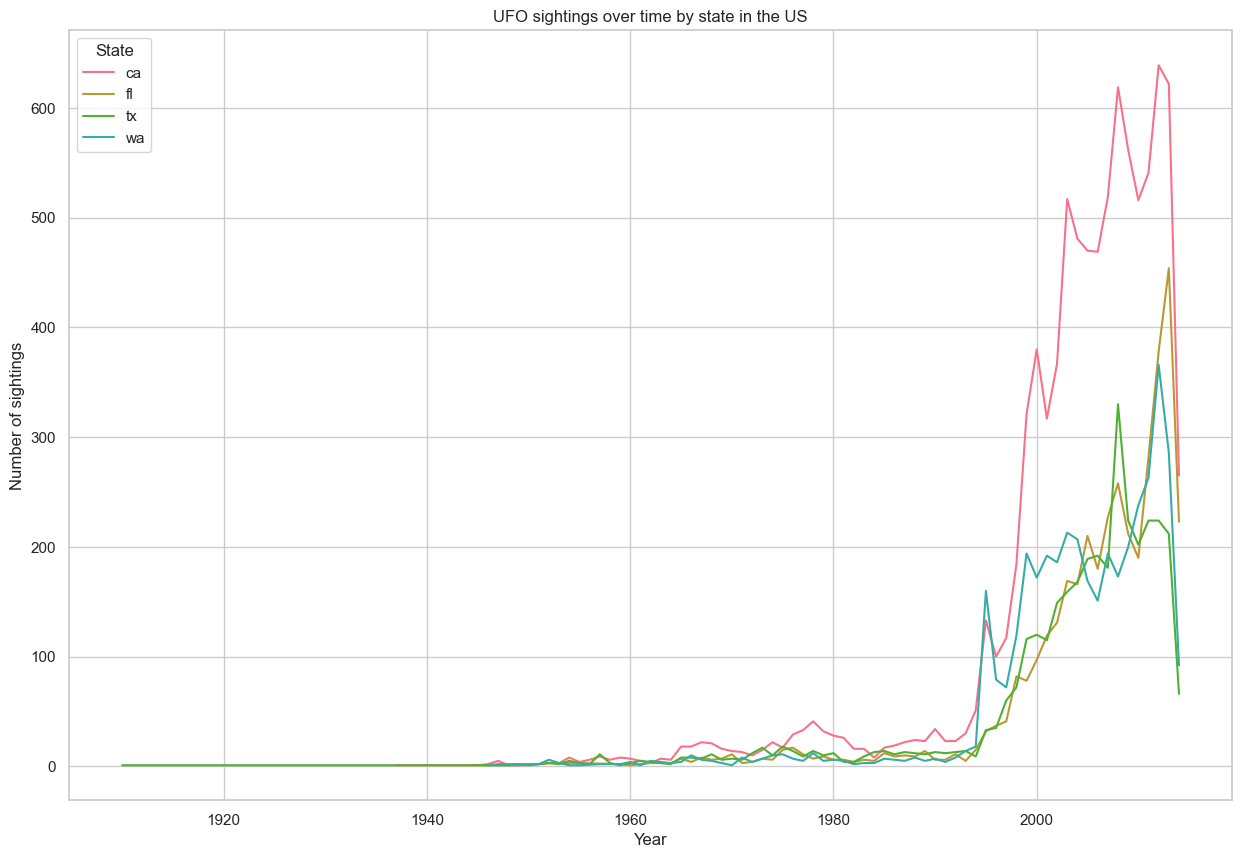

In [174]:
#Here we plot all ufo sightings in USA by state over time with more than 3000
#sightings


sightings_by_state_and_year = df[df['country'] == 'us'].groupby([df['state'], df['datetime'].dt.year])['datetime'].count()

states_total_count = df[df['country'] == 'us'].groupby('state')['datetime'].count()
states = states_total_count[states_total_count >= 3000].index

for state in states:
    state_sightings_by_year = sightings_by_state_and_year[state]
    plt.plot(state_sightings_by_year.index, state_sightings_by_year.values, label=state)

plt.xlabel('Year')
plt.ylabel('Number of sightings')
plt.title('UFO sightings over time by state in the US')
plt.legend(title='State')
plt.show()


#state key

#ca = California
#fl = Florida
#tx = Texas
#wa = Washington

/var/folders/16/cjdm0db91wgbsrjn79p4gn7w0000gn/T/ipykernel_99810/555732312.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')


Text(0.5, 1.0, 'UFO shape frequency')

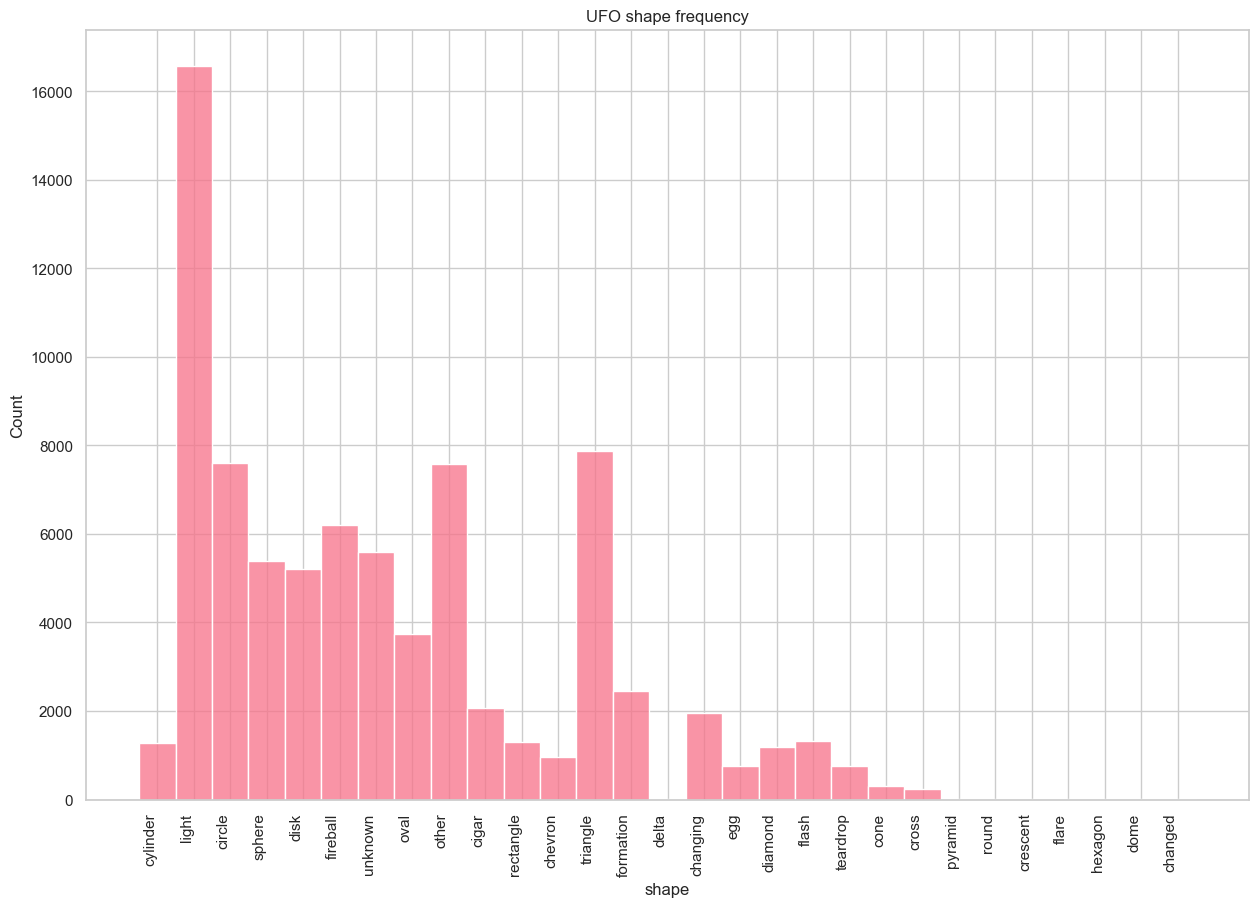

In [177]:
ax = sns.histplot(data = df, x = 'shape')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
ax.set_title('UFO shape frequency')

/var/folders/16/cjdm0db91wgbsrjn79p4gn7w0000gn/T/ipykernel_99810/2765739401.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'UFO shape frequency in USA')

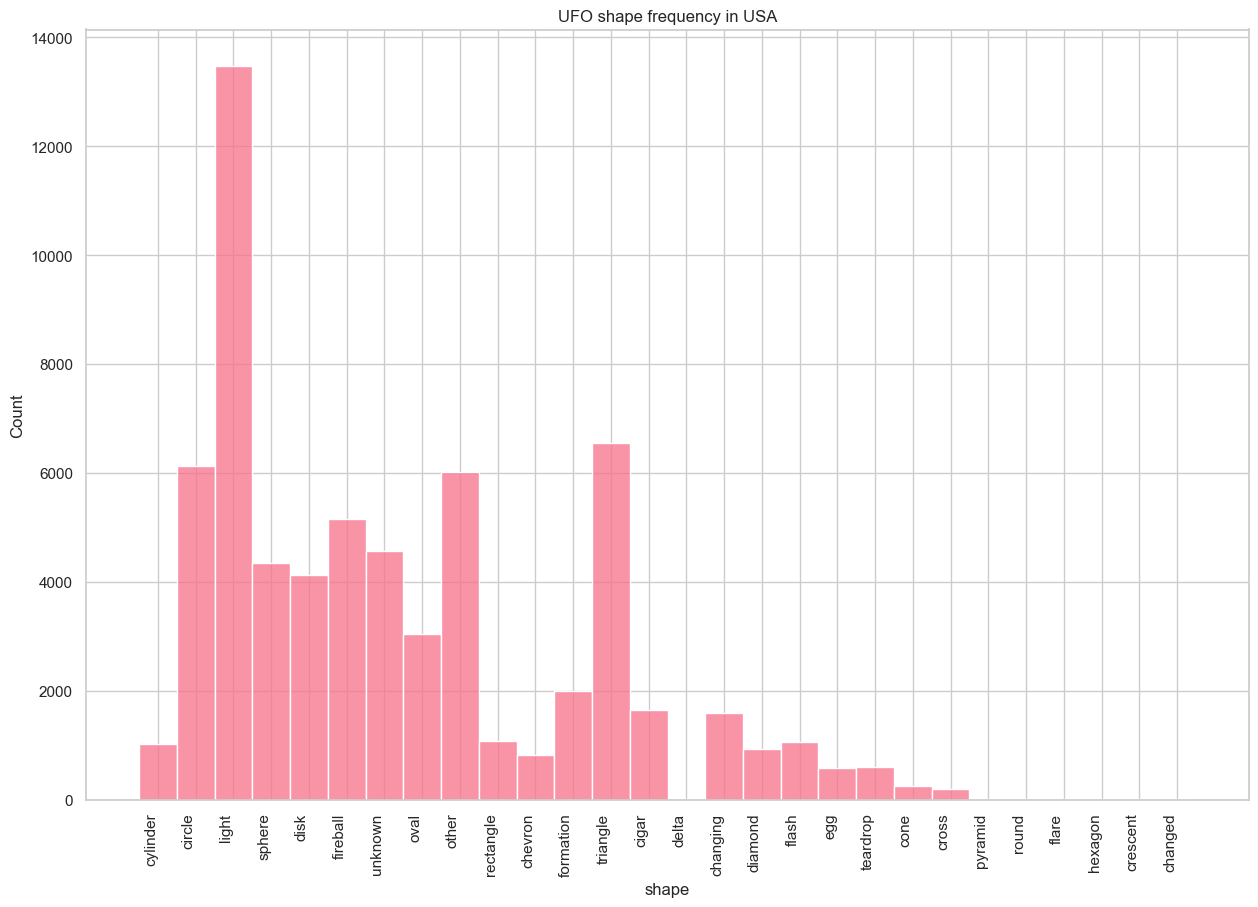

In [178]:
ax = sns.histplot(data=df[df['country'] == 'us'], x='shape')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title('UFO shape frequency in USA')


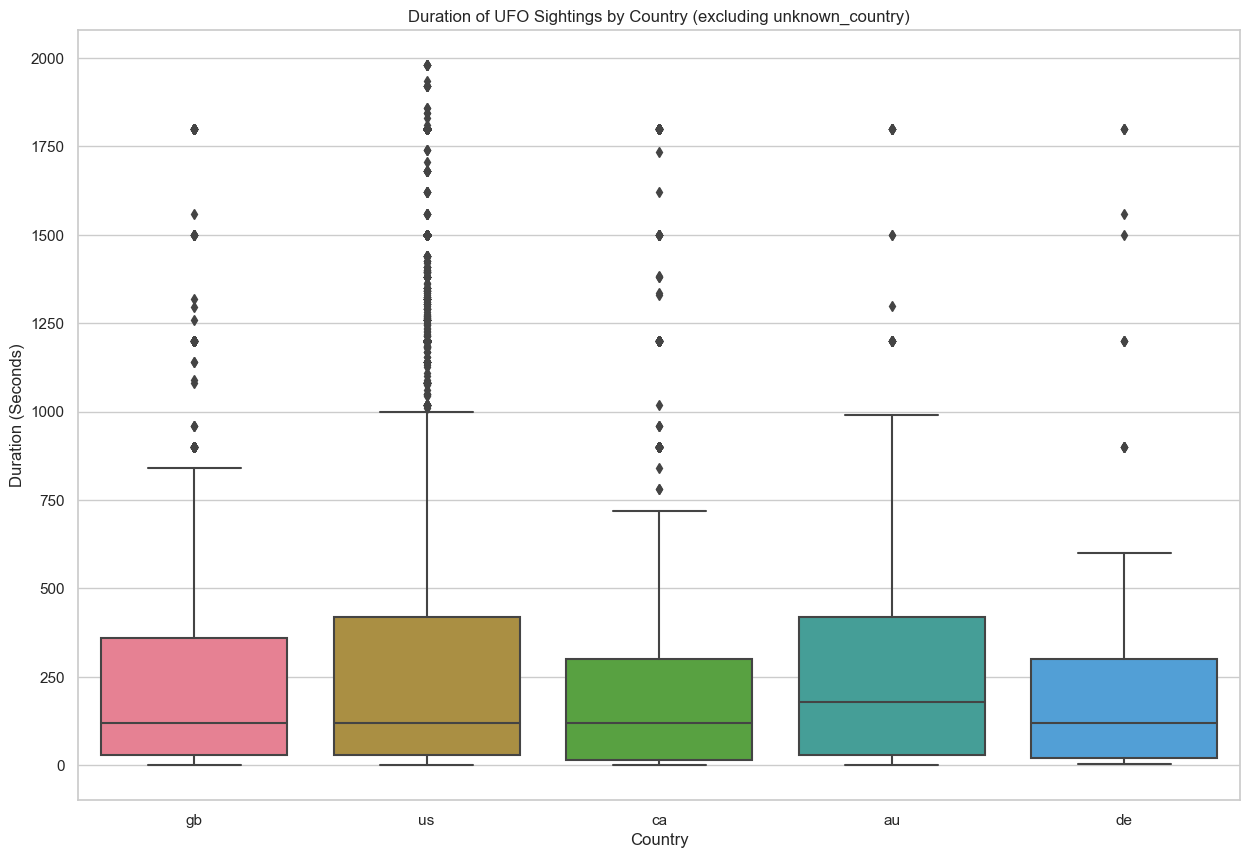

In [191]:
filtered_data = df[(df['duration (seconds)'] >= 0) & (df['duration (seconds)'] <= 2000) & (df['country'] != 'unknown_country')]

sns.boxplot(x="country", y="duration (seconds)", data=filtered_data)
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.title("Duration of UFO Sightings by Country (excluding unknown_country)")
plt.xlabel("Country")
plt.ylabel("Duration (Seconds)")
plt.show()

/var/folders/16/cjdm0db91wgbsrjn79p4gn7w0000gn/T/ipykernel_99810/1330351681.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=filtered_data, x="duration (seconds)", shade=True)


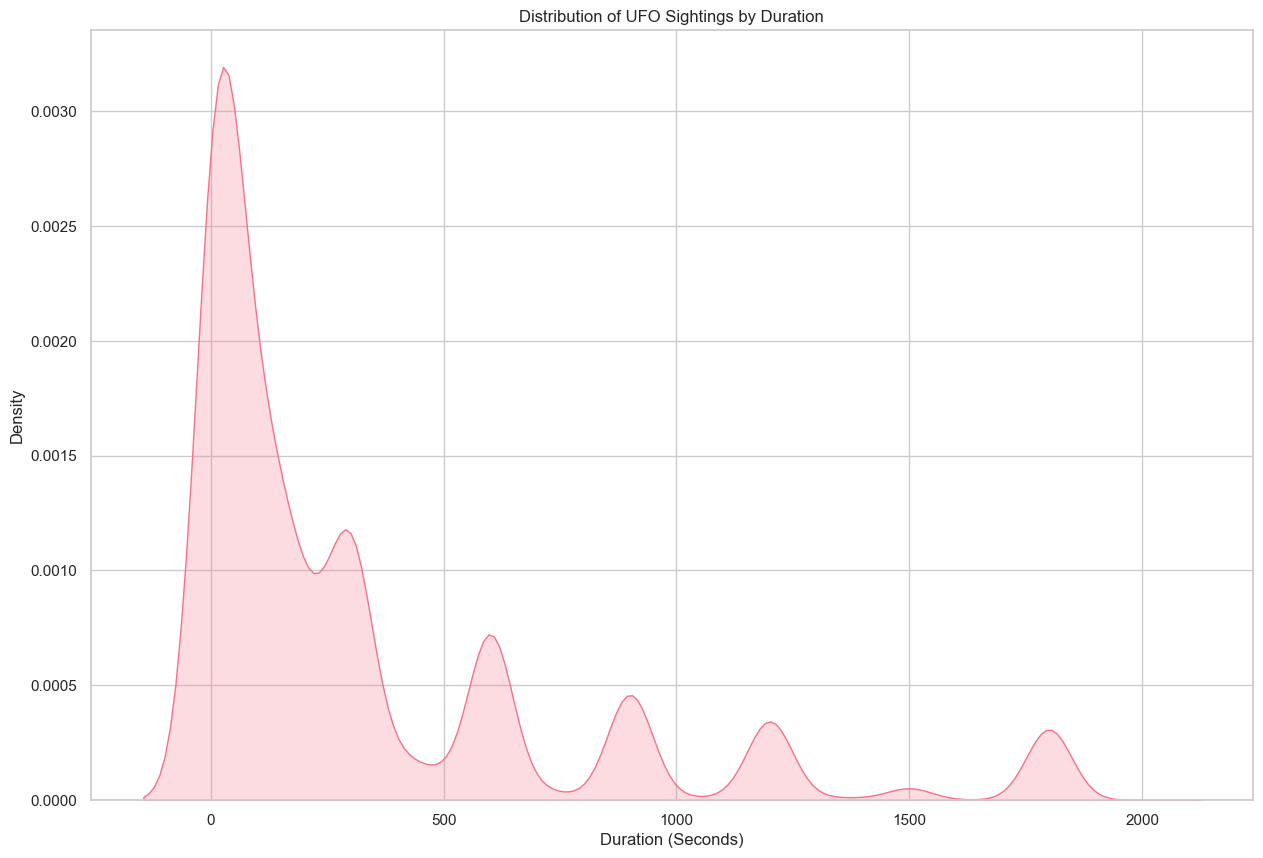

In [197]:
sns.kdeplot(data=filtered_data, x="duration (seconds)", shade=True)
plt.title("Distribution of UFO Sightings by Duration")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Density")
plt.show()

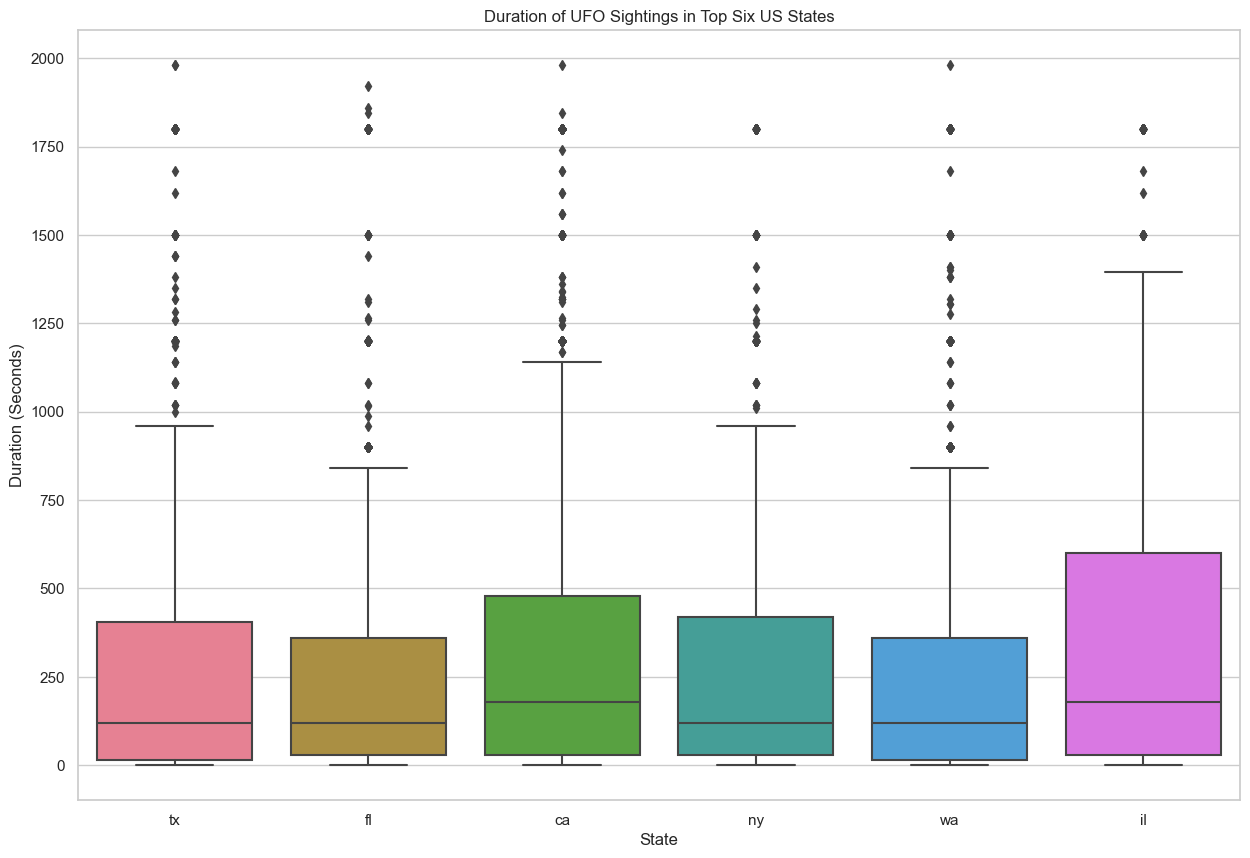

In [131]:
# filter data for US sightings only and plot the top 6 states
us_data = df[df['country'] == 'us']


top_six_states = us_data['state'].value_counts().head(6).index.tolist()


filtered_data = us_data[us_data['state'].isin(top_six_states) & (us_data['duration (seconds)'] >= 0) & (us_data['duration (seconds)'] <= 2000)]


sns.boxplot(x="state", y="duration (seconds)", data=filtered_data)
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.title("Duration of UFO Sightings in Top Six US States")
plt.xlabel("State")
plt.ylabel("Duration (Seconds)")
plt.show()




#state key
#az = Arizona
#ca = California
#fl = Florida
#il = Illinois
#mi = Michigan
#nc = North Carolina
#ny = New York
#oh = Ohio
#or = Oregon
#pa = Pennsylvania
#tx = Texas
#wa = Washington


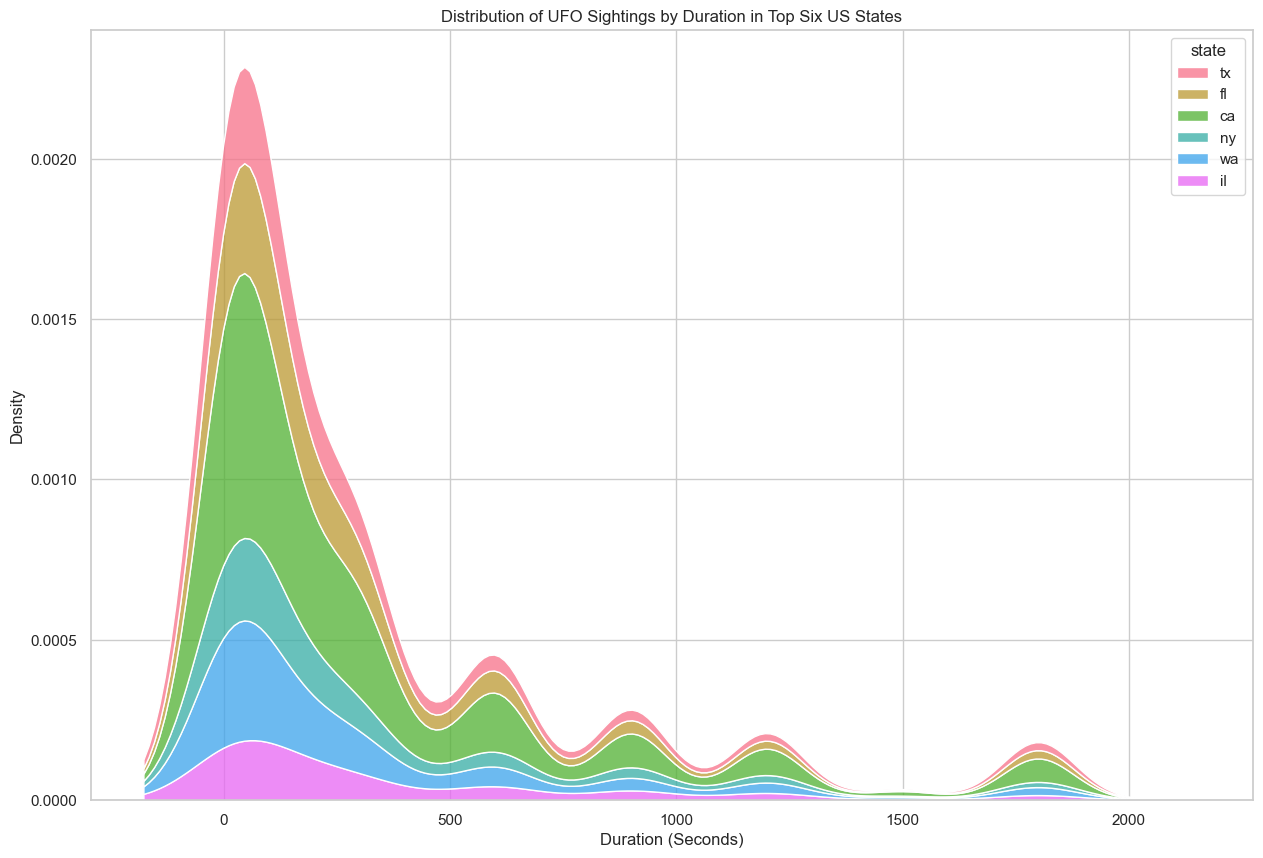

In [199]:
top_six_states = us_data['state'].value_counts().head(6).index.tolist()
filtered_data = us_data[us_data['state'].isin(top_six_states) & (us_data['duration (seconds)'] >= 0) & (us_data['duration (seconds)'] <= 2000)]

sns.kdeplot(data=filtered_data, x="duration (seconds)", hue="state", multiple="stack")
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.title("Distribution of UFO Sightings by Duration in Top Six US States")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Density")
plt.show()

# Addressing the project goal

In [ ]:
## Main project Goal ##
# Based on the frequency and location of UFO sightings, which geographic areas demonstrate the 
# highest levels of interest or historical significance related to UFOs? 

In [43]:
#now filtering the dataframe to only include the data from the US
us_df = df[df['country'] == 'us']

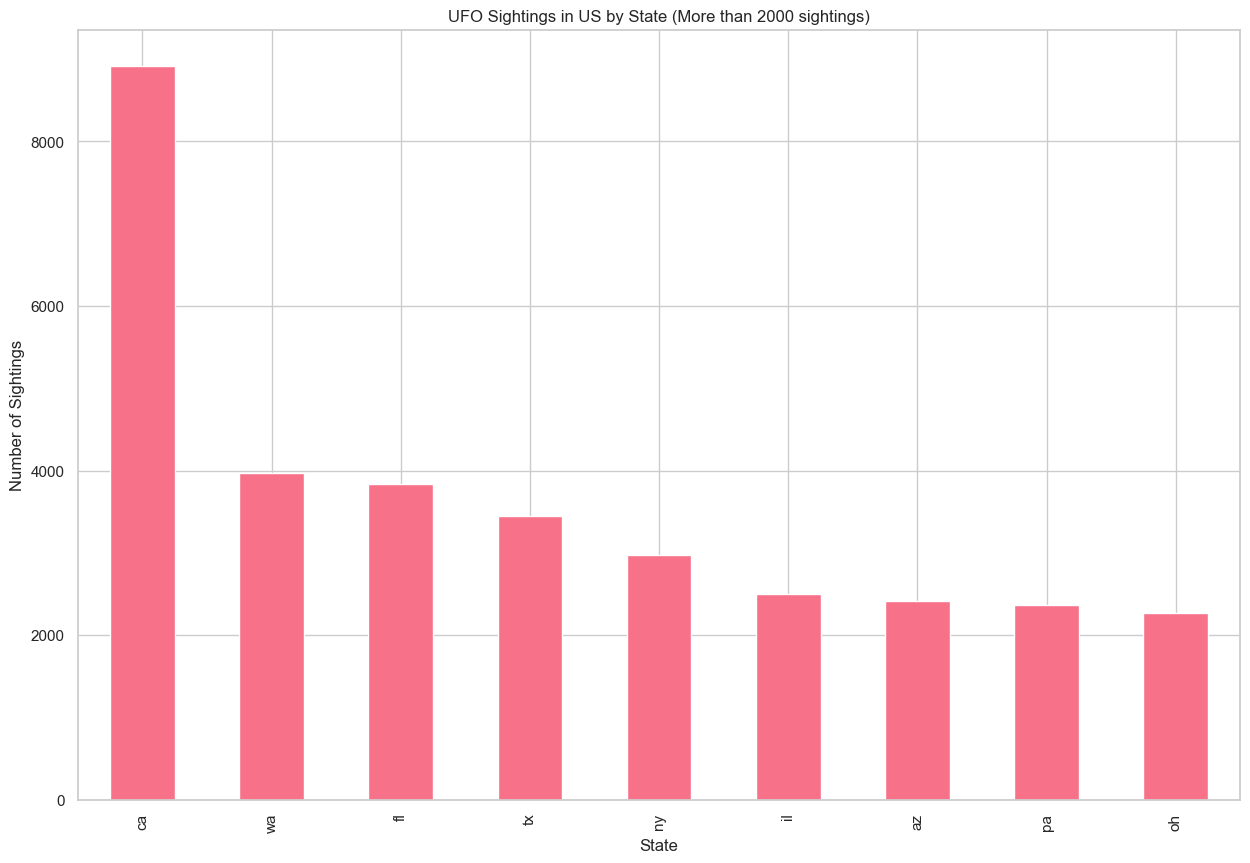

In [180]:
#sightings by state in USA (2000+ sightings)
state_counts = us_df['state'].value_counts()
state_counts = state_counts[state_counts > 2000]

state_counts.plot(kind='bar')
plt.title('UFO Sightings in US by State (More than 2000 sightings)')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.show()

#we can see that California has the most sightings

#state key
#az = Arizona
#ca = California
#fl = Florida
#il = Illinois
#mi = Michigan
#nc = North Carolina
#ny = New York
#oh = Ohio
#or = Oregon
#pa = Pennsylvania
#tx = Texas
#wa = Washington

In [44]:
#an easier way to code it here:

us_df = df[df['country'] == 'us']
state_counts = us_df['state'].value_counts()
max_state = state_counts.index[0]
print('State with most sightings:', max_state)

State with most sightings: ca


In [39]:
import folium

def generateBaseMap(default_location=[37.7749, -122.4194], default_zoom_start=6):
    #create map centered on California
    base_map = folium.Map(
        location=default_location,
        control_scale=True,
        zoom_start=default_zoom_start,
        tiles='cartodbpositron'
    )
    return base_map

# create base map centered on California
california_map = generateBaseMap()

# show the map
california_map

In [40]:




ca_map = generateBaseMap(default_location=[36.7783, -119.4179], default_zoom_start=6)

ca_data = df.loc[df['state'] == 'ca'].sample(frac=0.1)

for _, row in ca_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['city'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(ca_map)
    
display(ca_map)

In [190]:
Markdown("<h1 style='font-size:28px'>Heatmap of UFO sightings in California</h1>")

<h1 style='font-size:28px'>Heatmap of UFO sightings in California</h1>

In [41]:
from folium.plugins import HeatMap

ca_df = df[df['state'] == 'ca']

ca_sample = ca_df.sample(frac=0.1)

ca_map = folium.Map(location=[37.2719, -119.2702], zoom_start=6)

heat_data = ca_sample[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data, radius=12).add_to(ca_map)

ca_map

In [ ]:
#we can see from the heatmap the areas with most sightings are Los Angeles
#Santa Monica and around Manhattan Beach

# Heatmap of UFO sightings in Washington

In [42]:
#compared to a heatmap of washington

wa_df = df[df['state'] == 'wa']

# take a sample of the data
wa_sample = wa_df.sample(frac=0.1)

# create a new map centered on Washington
wa_map = folium.Map(location=[47.7511, -120.7401], zoom_start=6)

# create the heatmap layer using the sample data
heat_data = wa_sample[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data, radius=12).add_to(wa_map)

# display the map
wa_map

# Heatmap of UFO sightings in Florida

In [43]:
# filter the data for Florida
fl_df = df[df['state'] == 'fl']

# take a sample of the data
fl_sample = fl_df.sample(frac=0.1)

# create a new map centered on Florida
fl_map = folium.Map(location=[27.6648, -81.5158], zoom_start=6)

# create the heatmap layer using the sample data
heat_data = fl_sample[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data, radius=12).add_to(fl_map)

fl_map

# Heatmap of UFO sightings in Texas

In [44]:
tx_df = df[df['state'] == 'tx']

tx_sample = tx_df.sample(frac=0.1)

tx_map = folium.Map(location=[31.9686, -99.9018], zoom_start=6)
heat_data = tx_sample[['latitude', 'longitude']].values.tolist()

HeatMap(heat_data, radius=12).add_to(tx_map)
tx_map


# Hypothesis testing

 Hypothesis test - We will conduct a hypothesis test to determine whether there is a significant difference 
 in the frequency of light-shaped UFO sightings compared to sightings of other shapes. The null hypothesis 
 is that the distribution of light-shaped sightings doesn't differ from the distribution of sightings of other shapes. 
 The dataset will be split into two groups: 'light' sightings and 'other' sightings. We will then use appropriate 
 statistical tests to compare the frequency of these two groups across different countries.


In [75]:
#lets look at the most common shape on our shape column
shape_counts = df['shape'].value_counts()
most_common_shape = shape_counts.idxmax()

print("The most common shape is", most_common_shape, "with", shape_counts[most_common_shape], "occurrences.")

The most common shape is light with 16565 occurrences.


In [195]:
#new column for shape class

df['shape_class'] = 2

for index, row in df.iterrows():
    if row['shape'] == 'light':
        df.at[index, 'shape_class'] = 1


A chi-squared hypothesis test is appropriate for testing whether there is a significant difference in the 
frequency of two or more categorical variables. 


In [76]:
from scipy.stats import chi2_contingency

#Null hypothesis: The distributions of class 1 and class 2 in 
#the shape_class column are the same.

#Alternative hypothesis: The distributions of class 1 and 
#class 2 in the shape_class column are not the same.

alpha = 0.5

contingency_table = pd.crosstab(df['shape_class'], df['country'])

statistic, p_value, dof, expected = chi2_contingency(contingency_table)
rows, cols = contingency_table.shape
deg_of_f = (rows - 1) * (cols - 1)
print("Chi-squared statistic:", statistic)
print("P-value:", p_value)

print("Degrees of freedom:", deg_of_f)

Chi-squared statistic: 9.05204333542068
P-value: 0.10700624334992717
Degrees of freedom: 5


The critical value for a chi-squared test with 5 degrees of freedom 
and alpha of 0.05 is 11.070

Since my calculated chi-squared statistic of 9.05 is less than the critical value of 11.070, 
we fail to reject the null hypothesis that the distributions of class 1 and class 2 in the 
shape_class column are the same.

/var/folders/16/cjdm0db91wgbsrjn79p4gn7w0000gn/T/ipykernel_99810/3404249539.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/var/folders/16/cjdm0db91wgbsrjn79p4gn7w0000gn/T/ipykernel_99810/3404249539.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


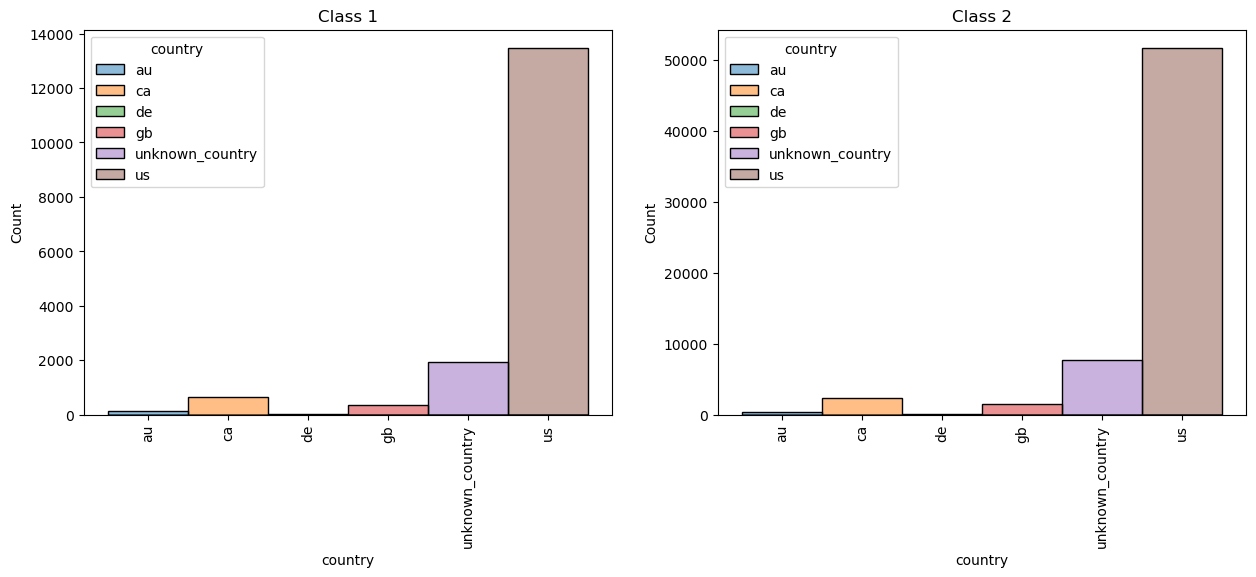

In [100]:
class1_df = class1_df.sort_values('country')
class2_df = class2_df.sort_values('country')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

sns.histplot(data=class1_df, x='country', hue='country', ax=ax1)
ax1.set_title('Class 1')

sns.histplot(data=class2_df, x='country', hue='country', ax=ax2)
ax2.set_title('Class 2')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()